In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tools.tools
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
sns.set(color_codes=True)

%matplotlib inline

/Users/nataliabernardo/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
with open("df_pre.pkl", 'rb') as picklefile: 
    df_pre = pickle.load(picklefile)
    

In [23]:
df_pre = df_pre[df_pre.rating > 0][df_pre.calories > 50][df_pre.calories < 2000][df_pre.carbohydrates > 1][df_pre.carbohydrates < 1000][df_pre.protein > 1][df_pre.protein < 1000][df_pre.cholesterol > 1][df_pre.serving > 0][df_pre.sodium > 1][df_pre.sodium < 2000][df_pre.reviews_count > 0][df_pre.make_it_again > 0][df_pre.date != 0][df_pre.cooking_time > 0]

/Users/nataliabernardo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


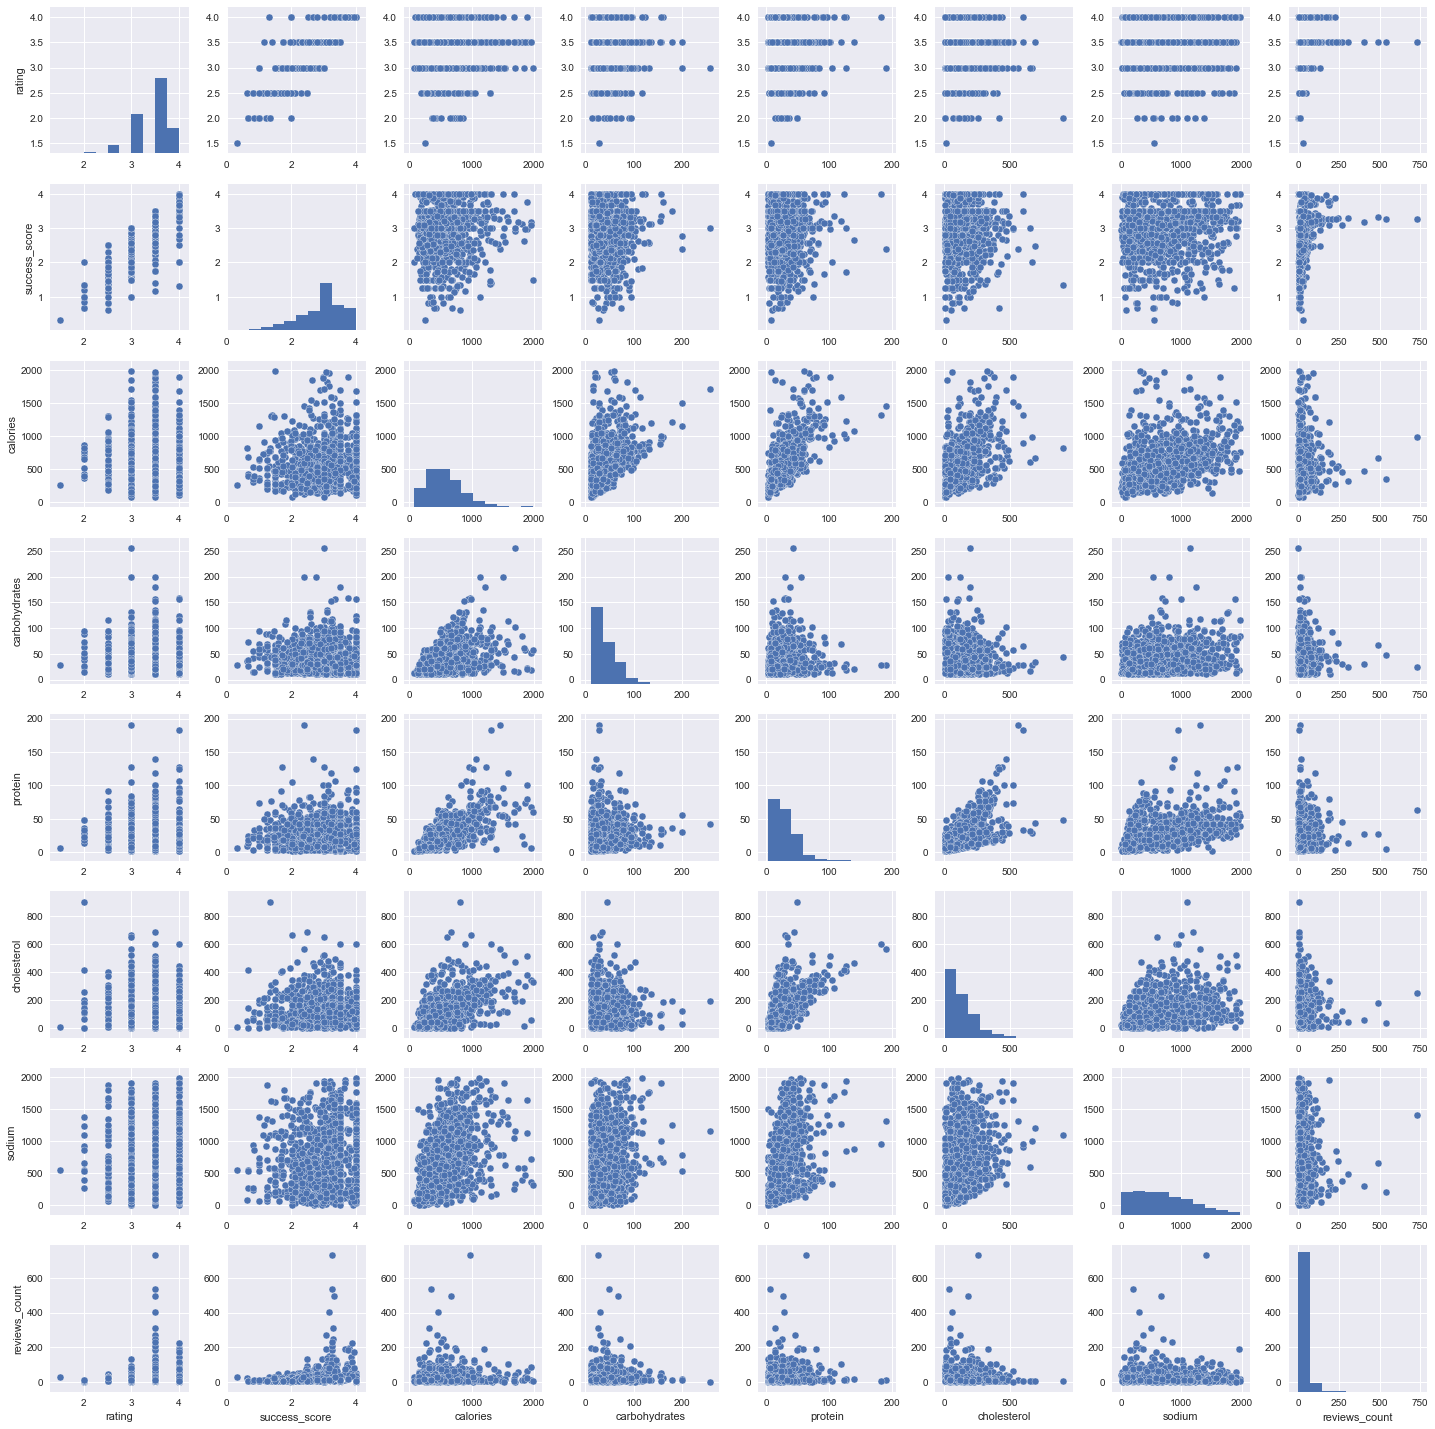

In [24]:
sns.pairplot(df_pre[['rating','success_score','calories', 'carbohydrates', 'protein', 'cholesterol','sodium', 'reviews_count']])

## Features Selection

In [29]:
# Recursive Feature Elimination

from sklearn.feature_selection import RFE
X = df_pre.drop(['rating','url','date','make_it_again','success_score'], axis =1)
y = df_pre['rating']

model = LinearRegression()
# create the RFE model and select 90 features
rfe = RFE(model, 90)
rfe = rfe.fit(X, y)
# summarize the selection of the attributes
selected_features_ranking = list(zip(X.columns,rfe.support_,rfe.ranking_))


In [30]:
#create a new dataframe with only features selected by RFE
selected_features = [i[0] for i in selected_features_ranking if i[1] == True]
selected_features_df = pd.DataFrame()
for i in selected_features:
    selected_features_df[i] = df_pre[i]
    

In [31]:
df = pd.merge(df_pre[['success_score','rating','url','calories', 'carbohydrates', 'protein', 'cholesterol','sodium', 'reviews_count','cooking_time']].reset_index(), selected_features_df.reset_index(), on = 'index', how='inner').set_index('index')
df

,success_score,rating,url,calories,carbohydrates,protein,cholesterol,sodium,reviews_count,cooking_time,...,Lime,Ground Lamb,Nutmeg,Pear,Beer,Mussel,Orange Juice,Okra,Fig,Trout
index,,,,,,,,,,,,,,,,,,,,,
"""Nextover"" Chicken Tacos with Quick Refried Beans",2.010,3.0,https://www.epicurious.com/recipes/food/views/...,1224,65,65,292,1632,3,20,...,0,0,0,0,0,0,0,0,0,0
10-Minute Chicken Flatbreads with Hummus and Yogurt,2.905,3.5,https://www.epicurious.com/recipes/food/views/...,463,42,35,115,917,6,10,...,0,0,0,0,0,0,0,0,0,0
10-Minute Sausage Skillet with Cherry Tomatoes and Broccolini,4.000,4.0,https://www.epicurious.com/recipes/food/views/...,476,20,22,70,1046,11,10,...,0,0,0,0,0,0,0,0,0,0
10-Minute Shrimp with Green Beans and Creamy Lemon-Dill Dip,2.500,2.5,https://www.epicurious.com/recipes/food/views/...,482,18,30,230,1189,3,10,...,0,0,0,0,0,0,0,0,0,0
3-Ingredient Cacio e Pepe (Pasta With Cheese and Pepper),1.200,2.0,https://www.epicurious.com/recipes/food/views/...,736,89,35,66,922,5,30,...,0,0,0,0,0,0,0,0,0,0
3-Ingredient Creamy Pumpkin Pasta,3.000,3.0,https://www.epicurious.com/recipes/food/views/...,694,91,17,102,508,1,25,...,0,0,0,0,0,0,0,0,0,0
"3-Ingredient Grilled Steak, Pineapple, and Avocado Salad",4.000,4.0,https://www.epicurious.com/recipes/food/views/...,902,39,47,186,838,3,35,...,0,0,0,0,0,0,0,0,0,0
3-Ingredient Ice Cream French Toast,4.000,4.0,https://www.epicurious.com/recipes/food/views/...,757,69,13,175,414,1,20,...,0,0,0,0,0,0,0,0,0,0
3-Ingredient Orecchiette with Sausage and Fennel,4.000,4.0,https://www.epicurious.com/recipes/food/views/...,500,72,26,26,603,6,25,...,0,0,0,0,0,0,0,0,0,0


In [32]:
df.describe()


,success_score,rating,calories,carbohydrates,protein,cholesterol,sodium,reviews_count,cooking_time,Egg,...,Lime,Ground Lamb,Nutmeg,Pear,Beer,Mussel,Orange Juice,Okra,Fig,Trout
count,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,...,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000
mean,2.950869,3.378122,588.219780,41.883117,28.406593,127.810190,710.158841,28.220779,65.413586,0.111888,...,0.003996,0.005994,0.003996,0.003996,0.003996,0.004995,0.001998,0.004995,0.003996,0.003996
std,0.705632,0.423829,319.099883,27.159774,21.252706,110.705781,459.604987,47.024847,60.643357,0.315386,...,0.063119,0.077227,0.063119,0.063119,0.063119,0.070534,0.044677,0.070534,0.063119,0.063119
min,0.315000,1.500000,73.000000,11.000000,2.000000,2.000000,8.000000,1.000000,7.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.555000,3.000000,345.000000,22.000000,13.000000,45.000000,317.000000,7.000000,30.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.080000,3.500000,531.000000,35.000000,25.000000,103.000000,646.000000,15.000000,45.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.400000,3.500000,752.000000,56.000000,39.000000,183.000000,1023.000000,33.000000,60.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.000000,4.000000,1983.000000,256.000000,191.000000,905.000000,1976.000000,731.000000,360.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
#antilog function

def antilog(number):
    return (10) ** number


In [34]:
#log variables

df['log_rating'] = df['rating'].apply(antilog)
df['log_success_score'] = df['success_score'].apply(antilog)
df['log_calories'] = np.log(df['calories'])
df['log_carbohydrates'] = np.log(df['carbohydrates'])
df['log_protein'] = np.log(df['protein'])
df['log_cholesterol'] = np.log(df['cholesterol'])
df['log_sodium'] = np.log(df['sodium'])



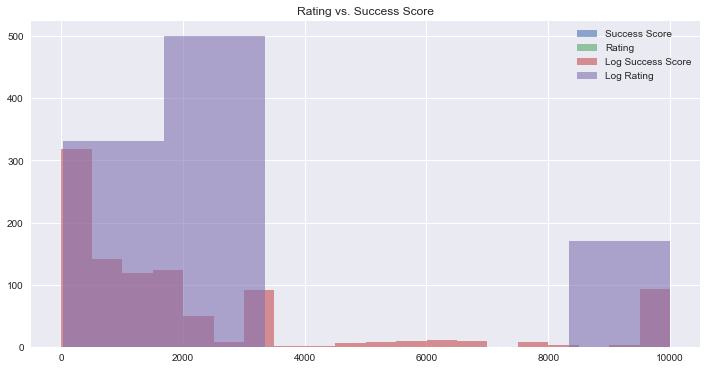

In [36]:
plt.figure(figsize=(12,6))
plt.hist(df['success_score'], bins = 20, alpha=0.6, label='Success Score')
plt.hist(df['rating'], bins = 6, alpha=0.6, label='Rating')
plt.hist(df['log_success_score'], bins = 20, alpha=0.6, label='Log Success Score')
plt.hist(df['log_rating'], bins = 6, alpha=0.6, label='Log Rating')
plt.legend(loc='upper right')
plt.title('Rating vs. Success Score')
plt.show()

In [39]:
X = df.drop(['rating','success_score','url','reviews_count'], axis =1)
y = df['log_success_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
## isolate the features for the training X
X_1 = X_train[['log_calories', 'log_carbohydrates', 'log_protein', 'log_cholesterol','log_sodium','cooking_time']]

In [41]:
## Add constant and use StatsModels to generate an OLS regression model
X_1 = sm.add_constant(X_1)
lm1 = sm.OLS(y_train, X_1)
lm1_fit = lm1.fit()


In [47]:
X = df.drop(['log_calories', 'carbohydrates', 'protein', 'cholesterol', 'log_sodium','cooking_time','rating','success_score','url','reviews_count', 'log_rating','log_success_score'], 1)
y = df['success_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_1 = sm.add_constant(X_train)
lm1 = sm.OLS(y_train, X_1)
lm1_fit = lm1.fit()
lm1_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          success_score   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     1.442
Date:                Wed, 31 Jan 2018   Prob (F-statistic):            0.00644
Time:                        16:33:52   Log-Likelihood:                -673.63
No. Observations:                 700   AIC:                             1539.
Df Residuals:                     604   BIC:                             1976.
Df Model:                          95                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        2.8214      0.243     11.601      0.000       2.344       3.299
calories                   4.94e-05      0.000      0.365      0.715      -0.000       0.000
sodium                       0.0002   7.71e-05      2.298      0.022    2.58e-05       0.000
Egg                         -0.0520      0.099     -0.525      0.600      -0.246       0.142
Pork                        -0.1649      0.111     -1.492      0.136      -0.382       0.052
Sausage                      0.1886      0.136      1.382      0.167      -0.079       0.457
Nut                          0.5508      0.255      2.156      0.031       0.049       1.053
Ginger                       0.2720      0.175      1.557      0.120      -0.071       0.615
Lemon                        0.2047      0.174      1.177      0.240      -0.137       0.546
Rice                        -0.3072      0.165     -1.865      0.063      -0.631       0.016
Pepper                      -0.3850      0.165     -2.340      0.020      -0.708      -0.062
Shellfish                    0.0893      0.183      0.487      0.626      -0.271       0.450
Green Bean                  -0.1266      0.210     -0.603      0.547      -0.539       0.286
Mozzarella                  -0.1491      0.186     -0.801      0.424      -0.515       0.217
Tortillas                    0.0477      0.177      0.270      0.787      -0.299       0.395
Yogurt                      -0.2593      0.176     -1.476      0.141      -0.604       0.086
Parsley                      0.3765      0.230      1.634      0.103      -0.076       0.829
Cheddar                     -0.4017      0.184     -2.182      0.029      -0.763      -0.040
Root Vegetable               0.3788      0.179      2.113      0.035       0.027       0.731
Chickpea                    -0.0356      0.240     -0.148      0.882      -0.507       0.436
Chile Pepper                 0.3718      0.181      2.053      0.041       0.016       0.727
Mint                         0.2292      0.227      1.012      0.312      -0.216       0.674
Ham                          0.1613      0.199      0.812      0.417      -0.229       0.551
Almond                      -0.0200      0.263     -0.076      0.939      -0.537       0.497
Eggplant                     0.3794      0.249      1.524      0.128      -0.109       0.868
Cinnamon                    -0.0691      0.216     -0.320      0.749      -0.493       0.354
Squash                      -0.2875      0.227     -1.267      0.206      -0.733       0.158
Hot Pepper                   0.2862      0.204      1.402      0.161      -0.115       0.687
Salmon                       0.2821      0.205      1.377      0.169      -0.120       0.685
Butternut Squash             0.1553      0.241      0.645      0.519      -0.318       0.629
Raisin        

### MVP

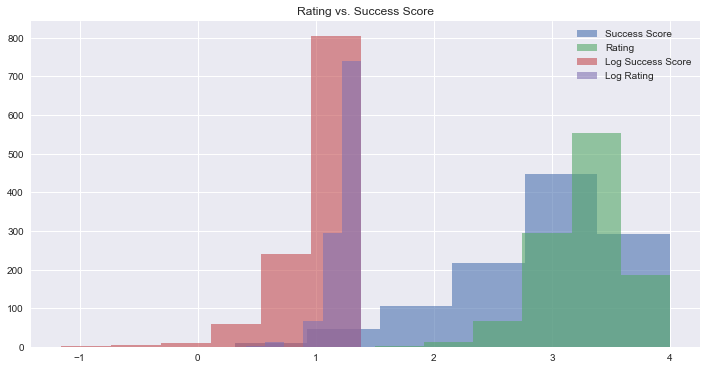

In [621]:
plt.figure(figsize=(12,6))
plt.hist(df['success_score'], bins = 6, alpha=0.6, label='Success Score')
plt.hist(df['rating'], bins = 6, alpha=0.6, label='Rating')
plt.hist(df['ln_success_score'], bins = 6, alpha=0.6, label='Log Success Score')
plt.hist(df['ln_rating'], bins = 6, alpha=0.6, label='Log Rating')
plt.legend(loc='upper right')
plt.title('Rating vs. Success Score')
plt.show()

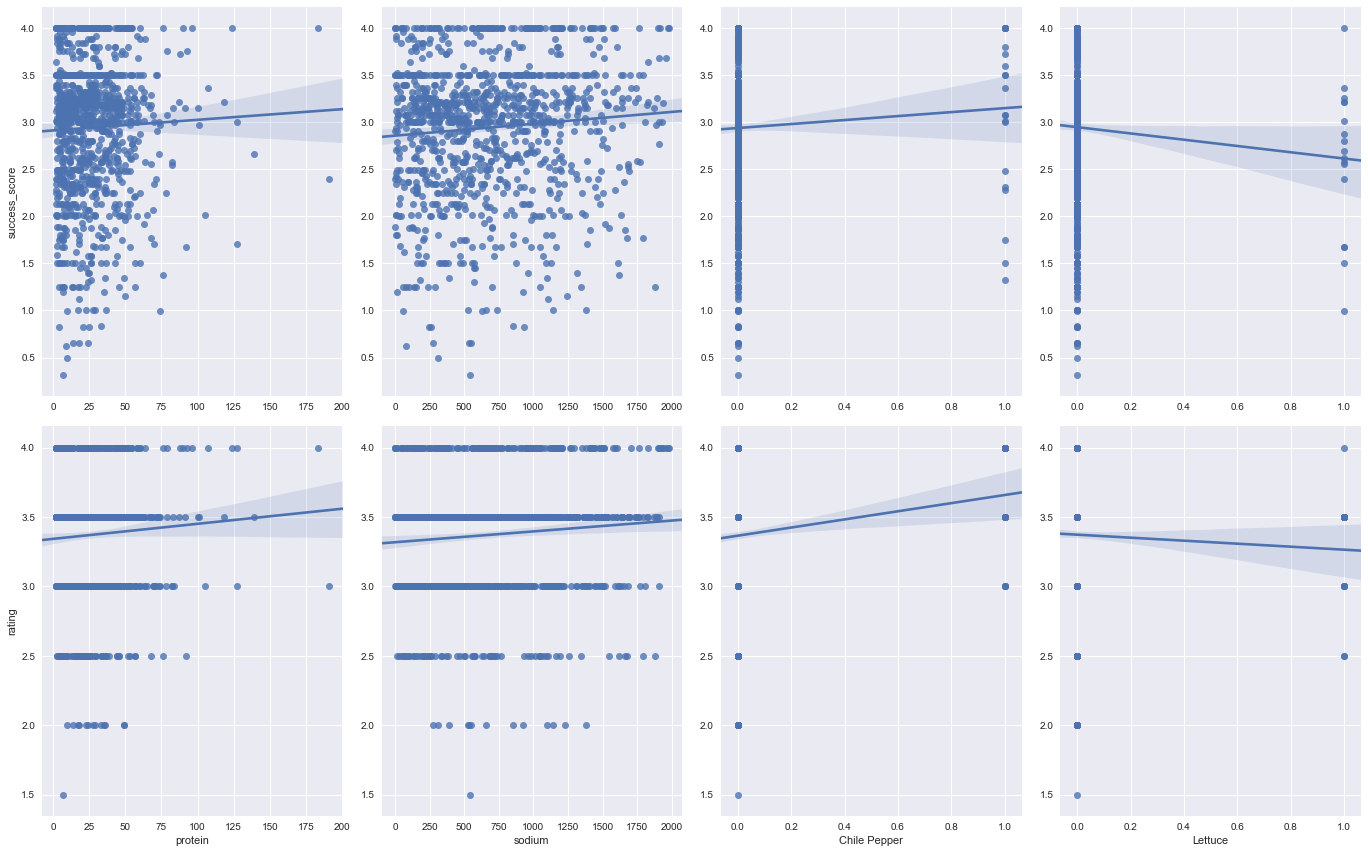

In [622]:
sns.pairplot(df1, x_vars=["protein","sodium","Chile Pepper","Lettuce"], y_vars=["success_score", "rating"],
             size=6, aspect=.8, kind="reg");


In [623]:
df = df.drop(df[['ln_rating','ln_success_score']], 1)

## Regression Model

### Linear Regression on Basic Features

In [624]:
X = df.drop(['rating','success_score','url','reviews_count'], axis =1)
y = df['success_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
## isolate the features for the training X
X_1 = X_train[['calories', 'carbohydrates', 'protein', 'cholesterol','sodium','cooking_time']]

In [625]:
## Add constant and use StatsModels to generate an OLS regression model
X_1 = sm.add_constant(X_1)
lm1 = sm.OLS(y_train, X_1)
lm1_fit = lm1.fit()
lm1_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          success_score   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.626
Date:                Wed, 31 Jan 2018   Prob (F-statistic):              0.137
Time:                        13:34:53   Log-Likelihood:                -839.22
No. Observations:                 782   AIC:                             1692.
Df Residuals:                     775   BIC:                             1725.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.8931      0.065     44.503      0.000       2.766       3.021
calories          0.0001      0.000      0.692      0.489      -0.000       0.000
carbohydrates    -0.0017      0.001     -1.559      0.119      -0.004       0.000
protein           0.0003      0.002      0.132      0.895      -0.004       0.004
cholesterol      -0.0004      0.000     -1.192      0.234      -0.001       0.000
sodium            0.0002   6.53e-05      2.364      0.018    2.62e-05       0.000
cooking_time      0.0002      0.000      0.490      0.624      -0.001       0.001
==============================================================================
Omnibus:                       79.321   Durbin-Watson:                   1.874
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              102.211
Skew:                          -0.826   Prob(JB):                     6.38e-23
Kurtosis:                       3.637   Cond. No.                     2.59e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Linear Regression on categorical variables for Ingredients

In [626]:
## Exclude basic variables
X_2 = X_train.drop(['calories', 'carbohydrates', 'protein', 'cholesterol', 'sodium','cooking_time'], 1)


In [627]:
lm2 = sm.OLS(y_train, X_2)
lm2_fit = lm2.fit()
lm2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          success_score   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.568
Method:                 Least Squares   F-statistic:                     12.41
Date:                Wed, 31 Jan 2018   Prob (F-statistic):           8.83e-96
Time:                        13:34:53   Log-Likelihood:                -1603.9
No. Observations:                 782   AIC:                             3388.
Df Residuals:                     692   BIC:                             3807.
Df Model:                          90                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Pasta                    1.3718      0.236      5.813      0.000       0.908       1.835
Egg                      1.3256      0.252      5.259      0.000       0.831       1.821
Pork                     0.9635      0.314      3.073      0.002       0.348       1.579
Parmesan                 1.4617      0.304      4.808      0.000       0.865       2.059
Sausage                  1.0364      0.359      2.891      0.004       0.332       1.740
Nut                      1.2915      0.462      2.795      0.005       0.384       2.199
Olive                    0.7720      0.450      1.716      0.087      -0.112       1.656
Lemon                    1.8127      0.422      4.296      0.000       0.984       2.641
Rice                     1.3522      0.441      3.066      0.002       0.486       2.218
Lamb                     1.5820      0.493      3.208      0.001       0.614       2.550
Pepper                   1.0422      0.462      2.255      0.024       0.135       1.950
Shellfish                2.3182      0.517      4.483      0.000       1.303       3.333
Green Bean               1.1889      0.491      2.423      0.016       0.226       2.152
Mozzarella               0.8911      0.495      1.800      0.072      -0.081       1.863
Tortillas                2.7219      0.574      4.742      0.000       1.595       3.849
Yogurt                   0.5281      0.619      0.853      0.394      -0.688       1.744
Parsley                  0.5951      0.512      1.163      0.245      -0.410       1.600
Cheddar                  1.0439      0.478      2.185      0.029       0.106       1.982
Root Vegetable           1.2137      0.596      2.036      0.042       0.043       2.384
Chickpea                 1.1662      0.502      2.323      0.020       0.181       2.152
Chile Pepper             1.7423      0.534      3.260      0.001       0.693       2.791
Mint                     1.7793      0.580      3.067      0.002       0.640       2.918
Ham                      1.4688      0.623      2.359      0.019       0.246       2.691
Almond                   1.3477      0.608      2.217      0.027       0.154       2.541
Eggplant                 1.5559      0.598      2.603      0.009       0.382       2.729
Squash                   1.0120      0.599      1.690      0.091      -0.164       2.187
Hot Pepper               1.6340      0.560      2.916      0.004       0.534       2.734
Orange                   2.0458      0.555      3.685      0.000       0.956       3.136
Salmon                   2.3453      0.645      3.636      0.000       1.079       3.612
Jalapeño                 0.9934      0.699      1.422      0.156      -0.378       2.365
Raisin                   1.0901      0.730      1.494      0.136      -0.343       2.523
Lettuce                  1.0837      0.533      2.034    

### Linear Regression for rating on all features

In [628]:
# Rating
X = df.drop(['rating','success_score','url','reviews_count'], axis =1)
y = df['rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

lm3 = sm.OLS(y_train, X_train)
lm3_fit = lm3.fit()
lm3_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     48.91
Date:                Wed, 31 Jan 2018   Prob (F-statistic):          3.11e-249
Time:                        13:34:54   Log-Likelihood:                -1261.8
No. Observations:                 782   AIC:                             2716.
Df Residuals:                     686   BIC:                             3163.
Df Model:                          96                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
calories                 0.0009      0.000      3.291      0.001       0.000       0.001
carbohydrates            0.0163      0.002      7.070      0.000       0.012       0.021
protein                  0.0073      0.004      1.677      0.094      -0.001       0.016
cholesterol           5.831e-05      0.001      0.071      0.943      -0.002       0.002
sodium                   0.0009      0.000      6.623      0.000       0.001       0.001
cooking_time             0.0071      0.001      9.068      0.000       0.006       0.009
Pasta                   -0.1379      0.175     -0.787      0.432      -0.482       0.206
Egg                      0.3375      0.214      1.579      0.115      -0.082       0.757
Pork                     0.1694      0.196      0.866      0.387      -0.215       0.553
Parmesan                 0.8879      0.195      4.564      0.000       0.506       1.270
Sausage                  0.3051      0.230      1.325      0.186      -0.147       0.757
Nut                      0.2994      0.291      1.028      0.304      -0.272       0.871
Olive                    0.3648      0.298      1.223      0.222      -0.221       0.950
Lemon                    0.7549      0.311      2.431      0.015       0.145       1.365
Rice                     0.1580      0.272      0.582      0.561      -0.375       0.691
Lamb                     0.1644      0.311      0.529      0.597      -0.446       0.775
Pepper                   0.0023      0.348      0.006      0.995      -0.682       0.686
Shellfish                0.7989      0.331      2.414      0.016       0.149       1.449
Green Bean               0.5371      0.318      1.688      0.092      -0.088       1.162
Mozzarella              -0.1601      0.314     -0.509      0.611      -0.777       0.457
Tortillas                0.4701      0.360      1.305      0.192      -0.237       1.177
Yogurt                  -0.0100      0.346     -0.029      0.977      -0.689       0.669
Parsley                  0.6782      0.353      1.920      0.055      -0.015       1.372
Cheddar                  0.6545      0.328      1.997      0.046       0.011       1.298
Root Vegetable           0.9986      0.350      2.853      0.004       0.311       1.686
Chickpea                -0.5037      0.360     -1.399      0.162      -1.211       0.203
Chile Pepper             0.6909      0.351      1.970      0.049       0.002       1.379
Mint                     0.9244      0.358      2.582      0.010       0.221       1.628
Ham                      0.4179      0.408      1.025      0.306      -0.383       1.219
Almond                   0.7176      0.335      2.143      0.032       0.060       1.375
Eggplant                 0.7245      0.344      2.109      0.035       0.050       1.399
Squash                  -0.1132      0.398     -0.284    

In [629]:
predictions = lm3_fit.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1.08229587267
MSE: 1.73930210343
RMSE: 1.31882603228


Text(0.5,0,'Predicted outcome')

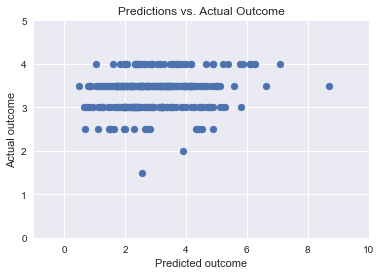

In [630]:
plt.scatter(predictions, y_test)
plt.title('Predictions vs. Actual Outcome')
plt.axis((-1,10,0,5))
plt.ylabel('Actual outcome')
plt.xlabel('Predicted outcome')

Text(0.5,0,'Predictions')

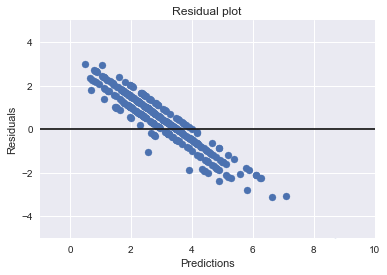

In [631]:
#residual plot versus predictions

x_plot = plt.scatter(predictions, (y_test - predictions))
plt.hlines(y=0, xmin= -1, xmax=50)
plt.title('Residual plot')
plt.axis((-1,10,-5,5))
plt.ylabel('Residuals')
plt.xlabel('Predictions')

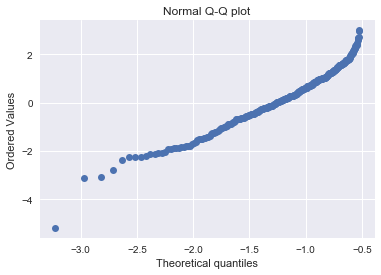

In [632]:
from scipy import stats
df['predict']=lm3_fit.predict(X_test)
df['resid']=y_test-df.predict
# We can diagnose/ inspect our residual normality assumption using qqplot:
stats.probplot(df['resid'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

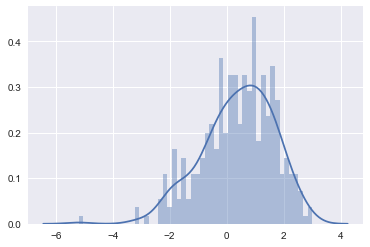

In [633]:
#residuals normal distributed
sns.distplot((y_test-predictions),bins=50);


### Linear Regression for Success score on all features

In [634]:
# Success score
X = df.drop(['rating','success_score','url','reviews_count','predict','resid'], axis =1)
y = df['success_score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

lm4 = sm.OLS(y_train, X_train)
lm4_fit = lm4.fit()
lm4_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          success_score   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     42.97
Date:                Wed, 31 Jan 2018   Prob (F-statistic):          6.82e-233
Time:                        13:34:57   Log-Likelihood:                -1213.3
No. Observations:                 782   AIC:                             2619.
Df Residuals:                     686   BIC:                             3066.
Df Model:                          96                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
calories                 0.0008      0.000      2.859      0.004       0.000       0.001
carbohydrates            0.0140      0.002      6.447      0.000       0.010       0.018
protein                  0.0059      0.004      1.354      0.176      -0.003       0.014
cholesterol              0.0003      0.001      0.373      0.709      -0.001       0.002
sodium                   0.0008      0.000      6.508      0.000       0.001       0.001
cooking_time             0.0056      0.001      7.568      0.000       0.004       0.007
Pasta                   -0.0481      0.162     -0.297      0.766      -0.366       0.269
Egg                      0.3601      0.199      1.814      0.070      -0.030       0.750
Pork                    -0.0145      0.193     -0.075      0.940      -0.393       0.364
Parmesan                 0.7033      0.187      3.756      0.000       0.336       1.071
Sausage                  0.2562      0.215      1.189      0.235      -0.167       0.679
Nut                      0.3888      0.301      1.293      0.196      -0.202       0.979
Olive                    0.2400      0.267      0.900      0.369      -0.284       0.764
Lemon                    0.7395      0.268      2.762      0.006       0.214       1.265
Rice                    -0.1914      0.262     -0.729      0.466      -0.707       0.324
Lamb                     0.0756      0.319      0.237      0.813      -0.551       0.702
Pepper                   0.2207      0.300      0.736      0.462      -0.368       0.810
Shellfish                0.8778      0.313      2.802      0.005       0.263       1.493
Green Bean               0.6196      0.291      2.131      0.033       0.049       1.191
Mozzarella              -0.0722      0.279     -0.259      0.796      -0.620       0.475
Tortillas                0.1835      0.355      0.517      0.605      -0.513       0.880
Yogurt                   0.2570      0.316      0.812      0.417      -0.364       0.878
Parsley                  0.7230      0.297      2.432      0.015       0.139       1.307
Cheddar                  0.3103      0.326      0.951      0.342      -0.330       0.951
Root Vegetable           1.0542      0.345      3.058      0.002       0.377       1.731
Chickpea                 0.1527      0.307      0.498      0.619      -0.449       0.755
Chile Pepper             0.5418      0.348      1.559      0.120      -0.141       1.224
Mint                     0.9744      0.310      3.146      0.002       0.366       1.583
Ham                      0.2584      0.421      0.614      0.539      -0.568       1.084
Almond                  -0.1986      0.405     -0.490      0.624      -0.994       0.596
Eggplant                 0.7731      0.381      2.029      0.043       0.025       1.521
Squash                  -0.0635      0.416     -0.153    

R^2 = 85%

"""Prob (F-statisic): If p-value < 0.05, we can reject the null hypothesis.
P >|t|: if p-value < 0.05, we can reject the null hypothesis: This variable does contribute to this model

Prob(Omnibus): The p-value for this test. If p-value < 0.05, we reject the null hypothesis, meaning that the residuals do not exactly follow the normal distribution that we assumed.
Jaque Beara: Normality Test
Prob(JB) Null hypothesis: ε is normally distributed.
Skewness and Kurtosis: Idea is we are looking for a skewness coeff. ~ 0, and Kurtosis ~ 3. JB tests if those conditions are held against alternatives.
Condition Number: Note that as the condition number becomes quite large, then this implies that the matrix is ill-posed (does not have a unique, well-defined solution). This may be due to multicollinear relationships between independent variables"""

### Predictions and Evaluations

In [635]:
from sklearn import metrics
predictions = lm4_fit.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1.14676513092
MSE: 1.99135991396
RMSE: 1.41115552437


### Homoscedascity analysis

Text(0.5,0,'Predicted outcome')

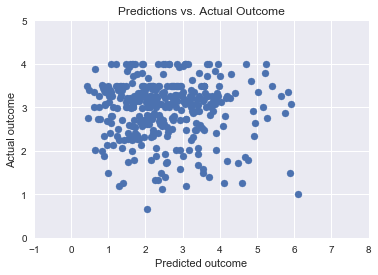

In [644]:
plt.scatter(predictions, y_test)
plt.title('Predictions vs. Actual Outcome')
plt.axis((-1,8,0,5))
plt.ylabel('Actual outcome')
plt.xlabel('Predicted outcome')

Text(0.5,0,'Predictions')

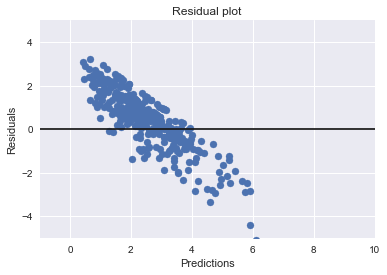

In [637]:
#residual plot versus predictions

x_plot = plt.scatter(predictions, (y_test - predictions))
plt.hlines(y=0, xmin= -1, xmax=50)
plt.title('Residual plot')
plt.axis((-1,10,-5,5))
plt.ylabel('Residuals')
plt.xlabel('Predictions')

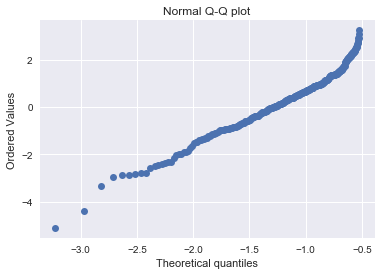

In [638]:
from scipy import stats
df['predict']=lm4_fit.predict(X_test)
df['resid']=y_test-df.predict
# We can diagnose/ inspect our residual normality assumption using qqplot:
stats.probplot(df['resid'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

Text(0,0.5,'Residuals')

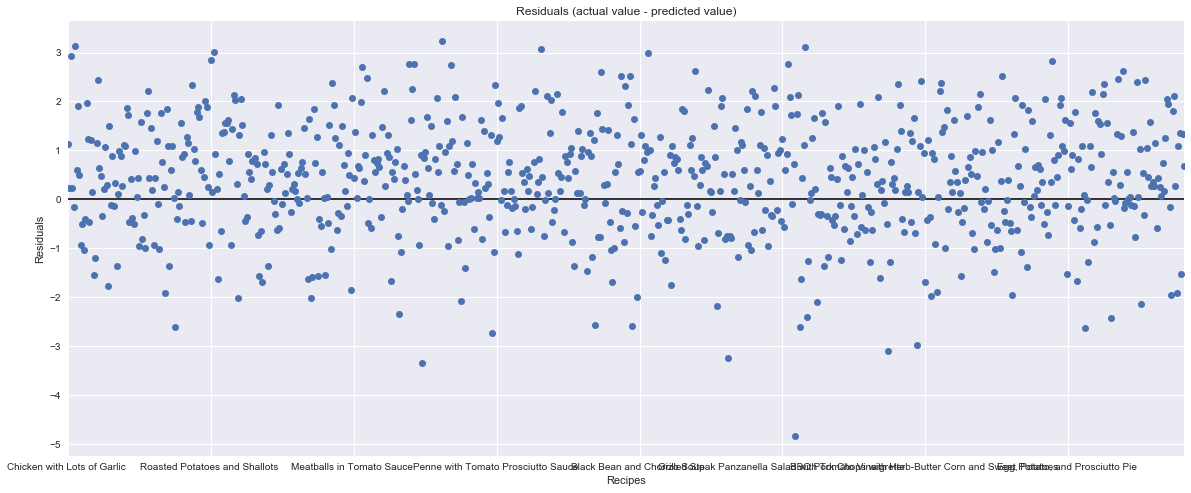

In [639]:
lm3_fit.resid.plot(style='o', figsize=(20,8))
plt.hlines(y=0, xmin= -1000, xmax=5000)
plt.title('Residuals (actual value - predicted value)')
plt.xlabel('Recipes')
plt.ylabel('Residuals')

#### Residual Histogram

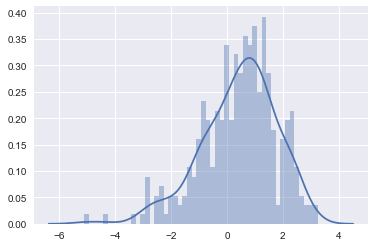

In [640]:
#residuals normal distributed
sns.distplot((y_test-predictions),bins=50);


## Cross-validation

In [641]:
#X = df.drop(['rating','success_score','url'], axis =1)
#y = df['success_score']

In [642]:
lm = linear_model.LinearRegression()
scores = cross_val_score(lm, X_train, y_train, cv = 5)
print (scores, scores.mean())

[-0.07030626 -0.10592121 -0.04304268 -0.14947011 -0.1534411 ] -0.10443627321


encv: alpha = 1e-07 mean squared error = 0.443369358912
encv: alpha = 1e-06 mean squared error = 0.44335801917
encv: alpha = 1e-05 mean squared error = 0.443245671174
encv: alpha = 0.0001 mean squared error = 0.442236293358
encv: alpha = 0.001 mean squared error = 0.439042046053
encv: alpha = 0.01 mean squared error = 0.483967661421
encv: alpha = 1 mean squared error = 0.494997193653
rcv: alpha = 1e-07 mean squared error = 0.443370618932
rcv: alpha = 1e-06 mean squared error = 0.443370608692
rcv: alpha = 1e-05 mean squared error = 0.44337050629
rcv: alpha = 0.0001 mean squared error = 0.443369482395
rcv: alpha = 0.001 mean squared error = 0.44335925586
rcv: alpha = 0.01 mean squared error = 0.443258216608
rcv: alpha = 1 mean squared error = 0.438545993629
lmse: alpha = 1e-07 mean squared error = 0.443368987471
lmse: alpha = 1e-06 mean squared error = 0.44335431013
lmse: alpha = 1e-05 mean squared error = 0.443209072014
lmse: alpha = 0.0001 mean squared error = 0.441938817949
lmse: alph

/Users/nataliabernardo/anaconda3/lib/python3.6/site-packages/matplotlib/legend.py:326: UserWarning: Unrecognized location "upper_left". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


Text(0.5,1,'MSE vs log(Alpha)')

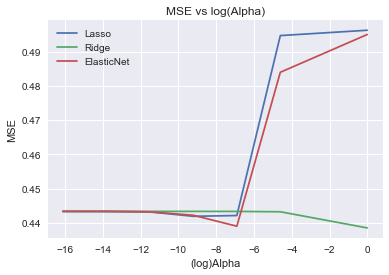

In [643]:

from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
encv = ElasticNetCV(cv = 10, alphas = [1e-5,1e-3,1,1e3,1e5])



alphas = [1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1]
enmse = []
for a in alphas:
    encv = ElasticNetCV(cv = 10, alphas =[a])
    encv.fit(X_train,y_train)
    enmse.append(mean_squared_error(y,encv.predict(X)))
    print('encv: alpha =',a, 'mean squared error =',mean_squared_error(y,encv.predict(X)))
    
rmse = []
for a in alphas:
    rcv = RidgeCV(cv = 10, alphas =[a])
    rcv.fit(X_train,y_train)
    rmse.append(mean_squared_error(y,rcv.predict(X)))
    print('rcv: alpha =',a, 'mean squared error =',mean_squared_error(y,rcv.predict(X)))
    
lmse = []
for a in alphas:
    lcv = LassoCV(cv = 10, alphas =[a])
    lcv.fit(X_train,y_train)
    lmse.append(mean_squared_error(y,lcv.predict(X)))
    print('lmse: alpha =',a, 'mean squared error =',mean_squared_error(y,lcv.predict(X)))
    
plt.figure(figsize=(20,10))    
fig, ax = plt.subplots(1,1)
ax.plot(np.log(alphas),lmse, label='Lasso')
ax.plot(np.log(alphas),rmse, label='Ridge')
ax.plot(np.log(alphas),enmse, label = 'ElasticNet')
leg = plt.legend(loc='upper_left', fancybox=True)
plt.xlabel('(log)Alpha')
plt.ylabel('MSE')
plt.title('MSE vs log(Alpha)')

The option that minimize the MSE is Ridge Regularization with alpha = 0.0001

### Ridge Regularization alpha = 0.0001

In [584]:
from sklearn.linear_model import ElasticNet
en = ElasticNet(alpha=0.01)

en.fit(X_train,y_train)
predicts = en.predict(X_test)
en.score(X_test, y_test)
#np.mean((predicts - y_test)**2)

0.0059960780930595758

In [595]:
from sklearn.linear_model import Ridge
rcv = Ridge(alpha=0.01)

rcv.fit(X_train,y_train)
predicts = rcv.predict(X_test)
rcv.score(X_test, y_test)
#np.mean((predicts - y_test)**2)

-0.058578775848957099

Text(0.5,0,'Predicted outcome')

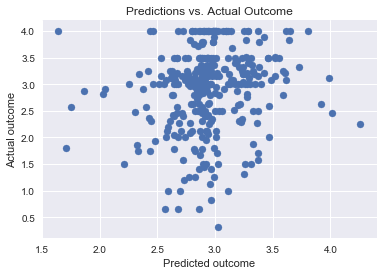

In [597]:
plt.scatter(predicts,y_test)
plt.title('Predictions vs. Actual Outcome')
plt.title('Predictions vs. Actual Outcome')
plt.ylabel('Actual outcome')
plt.xlabel('Predicted outcome')
plt.ylabel('Actual outcome')
plt.xlabel('Predicted outcome')

In [587]:
coeff_df = pd.DataFrame(rcv.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
calories,-0.000034
carbohydrates,-0.000893
protein,0.002242
cholesterol,-0.000592
sodium,0.000088
cooking_time,-0.000284
Pasta,-0.041167
Egg,0.113726
Pork,-0.253427
Parmesan,0.128647
